# Differential Equations in BCMB

There are a 

# Differential equations and rates

Biochemistry has _many_ differential equations.  Let's consider a zeroth-order reaction:

$\frac{d[C]}{dt} = -k$

Gives us the equation - where the rate at which a drug (or other substance) decays $\frac{d[C]}{dt}$ is dependent only on the constant $k$.  An example of a zeroth order reaction is the oxidation of ethanol in the human liver to acetaldehyde, catalyzed by alcohol dehydrogenase.  As long as there is a high enough amount of alcohol available, the reaction is limited only by how fast the enzyme can work (and the amount of enzyme available. 

If we integrate this, we can see that the concentration should behave like:

$C(t) = C_0 - kt$

With $C_0$ the initial amount of alcohol and $t$ as time. The resulting curve looks like this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t=np.linspace(0,100, 101) #Here's my time values from 0 to 1000
k=5 #rate constant
C_0=1000 #inital amount of alcohol
C=C_0 - k*t

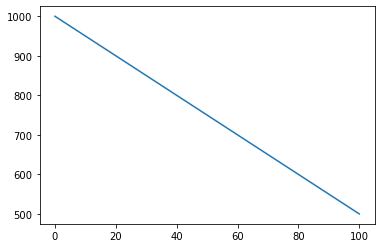

In [3]:
plt.plot(t, C)

Ok - so let's now consider a "first-order" rate equation, like either _exponential decay_ or _exponential growth_.

These rates generally follow:

$\frac{d[C]}{dt} = -k[C]$

Gives us the equation - where the rate at which a drug (or other substance) decays $\frac{d[C]}{dt}$ is dependent on the amount of the substance $[C]$ times a constant $k$. But . . . how do we solve this?  The rate of _change_ of the concentration is dependent _itself_ on the concentration.  Of course, if you've taken differential equations, you might know that the answer is:

$C(t)=C_0e^{-kt}$

But let's say we _don't_ know that.  What's another way to solve this?

We can use Euler's method (<https://en.wikipedia.org/wiki/Euler_method>).  This is a numerical method where you basically take _tiny_ little baby steps, estimating the rate at each time based on the concentration at that time, recalculating at each point.  Let me illustrate - let's start with an initial concentration of $C_0=1000$ and $k=0.5$.

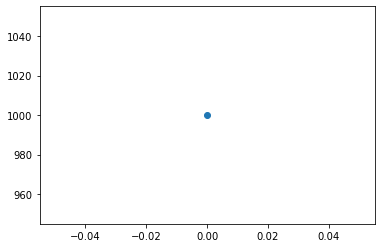

In [4]:
C=np.array([1000])
t=np.array([0])
k=0.5
plt.plot(t, C, '-o')

Now let's calculate $C$ at $t = 1$.  First we calculate the rate at $t=0$:

In [5]:
rate=np.array([-k*C[0]])
rate

array([-500.])

So the rate is $-500$ - let's now apply that rate from $t=0$ to calculate the concentration at $t=1$

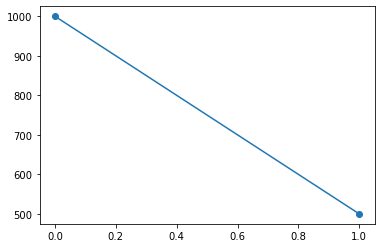

In [6]:
dt = 1 # The size of our time step is 1
t=np.append(t, t[0]+dt)
C=np.append(C, C[0]+dt*rate[0])
plt.plot(t, C, '-o')

So now at $t=1$ we have $C=500$. Let's repeat this now for $t=1$

In [7]:
rate=np.append(rate, -k*C[1])
rate

array([-500., -250.])

Ok - the rate is now $-250$.  Let's apply this.

In [8]:
C

array([1000.,  500.])

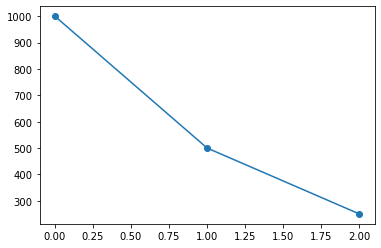

In [9]:
t=np.append(t, t[1]+dt)
C=np.append(C, C[1]+dt*rate[1])
plt.plot(t, C, '-o')

I see a pattern forming.  I bet I can do this with a for loop:

In [10]:
#Restart my values
C=np.array([1000])
t=np.array([0])
k=0.5
rate=np.array([-k*C[0]])
dt=1

In [ ]:
for i in range(100):
    t=np.append(t, t[i]+dt)
    C=np.append